In [1]:
import pandas as pd

user_activity = pd.read_csv('data/app_users.csv', index_col = [0])
user_activity.head()

,visit_per_month,use_time
0,14,22.8
1,32,13.6
2,8,3.1
3,13,5.7
4,19,20.8


C:\Users\leoyo\AppData\Local\Temp\ipykernel_2820\117940873.py:7: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x='visit_per_month', y='use_time', data=user_activity, s=100, palette='bright')


<Axes: xlabel='visit_per_month', ylabel='use_time'>

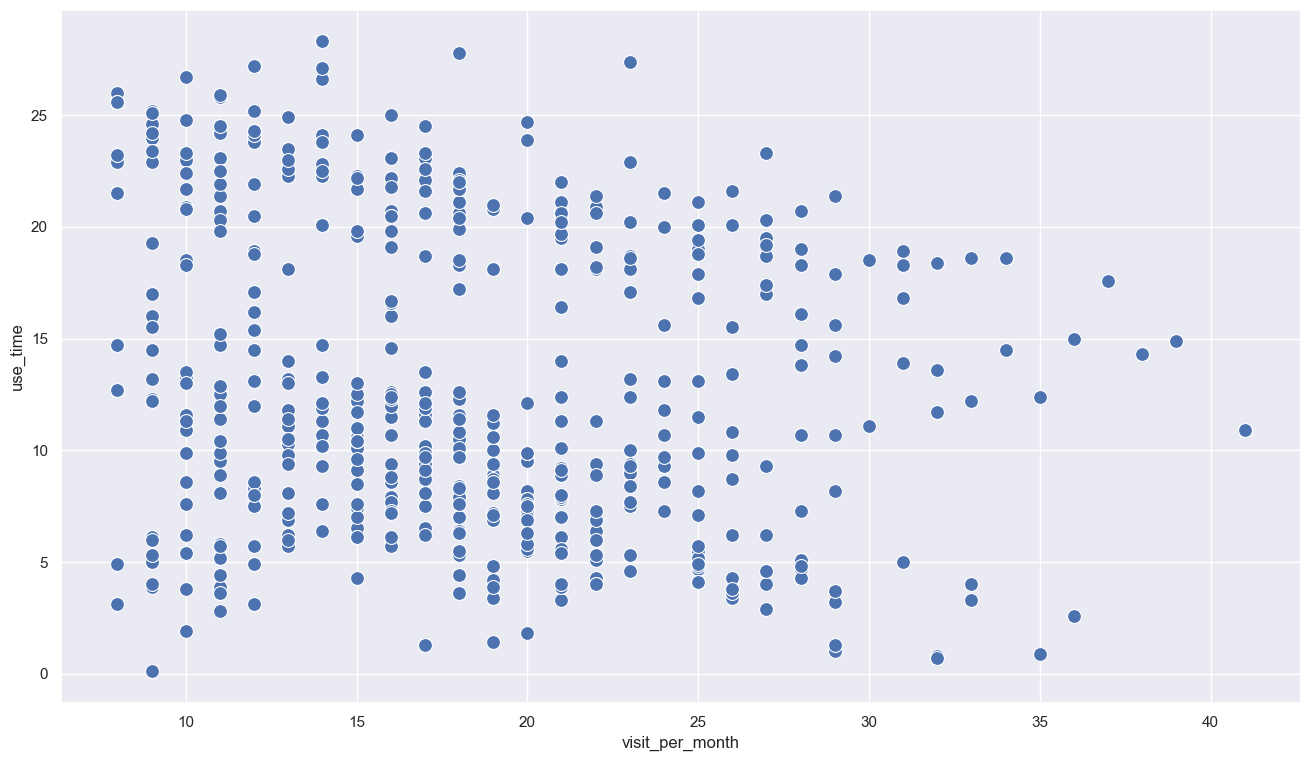

In [3]:
import seaborn as sns

sns.set(style='darkgrid',
        rc={'figure.figsize':(16, 9)})

# 시각화
sns.scatterplot(x='visit_per_month', y='use_time', data=user_activity, s=100, palette='bright')

In [5]:
from sklearn.cluster import KMeans

model = KMeans(n_clusters=3, random_state=123)
model.fit(user_activity)

# 클러스터 구분
user_activity['label'] = model.predict(user_activity)

# 클러스터별 속한 유저 수
user_activity.groupby('label').count()

C:\Users\leoyo\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


,visit_per_month,use_time
label,,
0,229,229
1,121,121
2,150,150


<Axes: xlabel='visit_per_month', ylabel='use_time'>

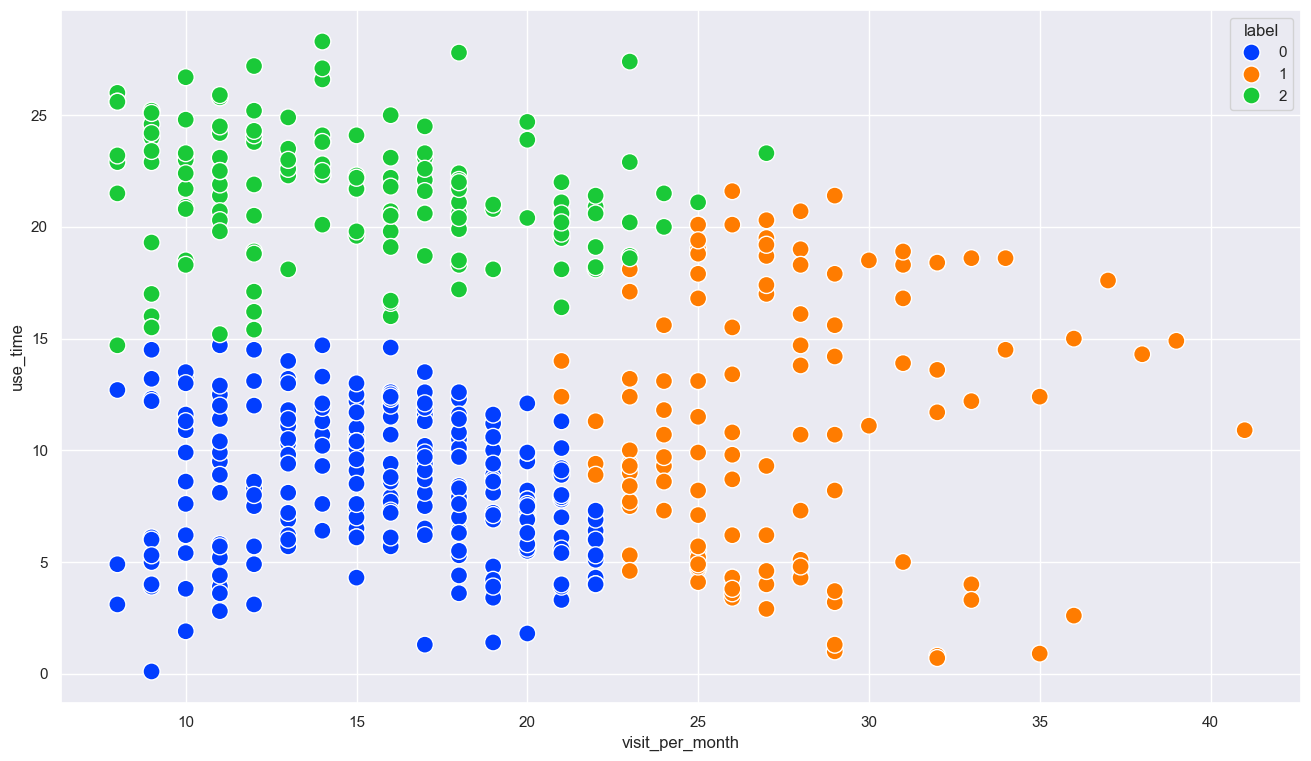

In [7]:
# 시각화
sns.scatterplot(x='visit_per_month', y='use_time', data=user_activity, hue=user_activity['label'], s = 150, palette='bright')

In [9]:
import pandas as pd

# 판다스 출력 결과를 소수점 둘째 자리 까지로 제한
pd.options.display.float_format = '{:,.2f}'.format

sales_df = pd.read_csv('data/sales_data.csv', index_col=['customer_id'])

sales_df

,total_buy_cnt,total_price
customer_id,,
12395,99,430250
12427,98,566410
12431,122,849900
12433,625,1180950
12471,10,97750
...,...,...
18144,30,90750
18168,243,1533530
18225,1,91430


<Axes: xlabel='total_buy_cnt', ylabel='total_price'>

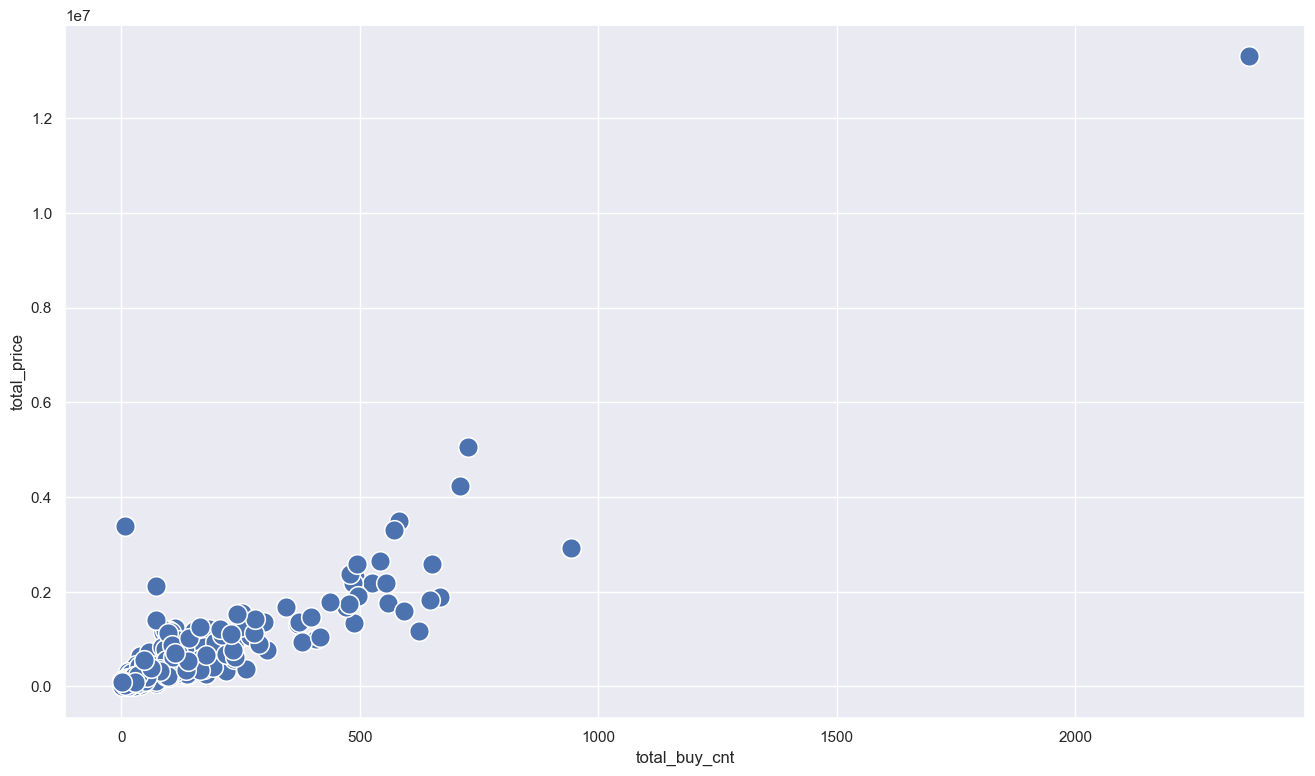

In [11]:
import seaborn as sns

sns.set(style="darkgrid",
        rc={'figure.figsize':(16,9)})

# 데이터 시각화
sns.scatterplot(x=sales_df['total_buy_cnt'], y=sales_df['total_price'], s=200)

In [13]:
def get_outlier_mask(df, weight=1.5):   
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)

    IQR = Q3 - Q1
    IQR_weight = IQR * weight

    range_min = Q1 - IQR_weight
    range_max = Q3 + IQR_weight

    outlier_per_column = (df < range_min) | (df > range_max)
    
    is_outlier = outlier_per_column.any(axis=1)

    return is_outlier

<Axes: xlabel='total_buy_cnt', ylabel='total_price'>

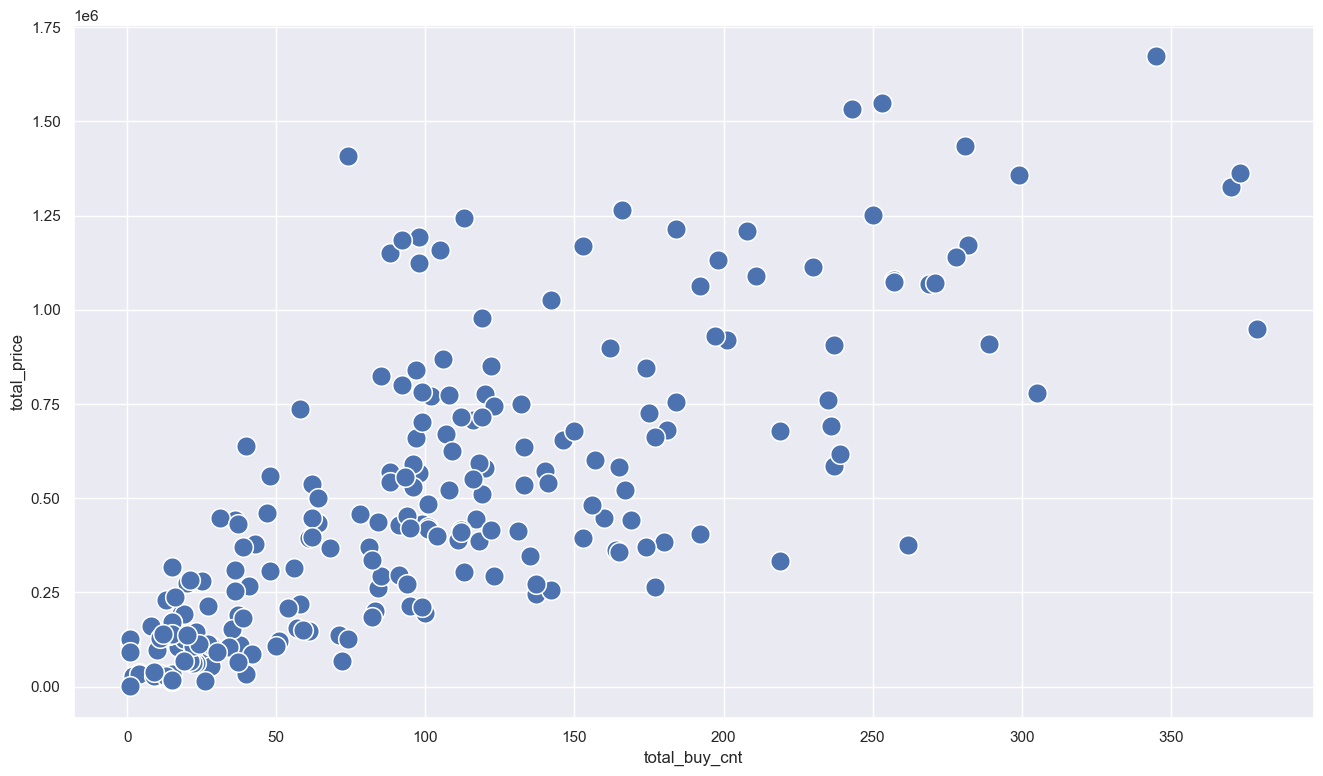

In [15]:
outlier_idx_cust_df = get_outlier_mask(sales_df, weight=1.5)

# 아웃라이어 제거한 데이터 프레임만 추가
sales_df = sales_df[~outlier_idx_cust_df]

# 아웃라이어 제거한 데이터프레임 시각화
sns.scatterplot(x=sales_df['total_buy_cnt'], y=sales_df['total_price'], s=200)

In [17]:
df_mean = sales_df.mean()  # 각 컬럼의 평균값
df_std = sales_df.std()  # 각 컬럼의 표준편차

scaled_df = (sales_df - df_mean)/df_std  # 컬럼별 표준화 진행 

scaled_df.columns = ['total_buy_cnt', 'total_price']

# 인덱스 설정
scaled_df.index = sales_df.index 

scaled_df


,total_buy_cnt,total_price
customer_id,,
12395,-0.05,-0.15
12427,-0.07,0.21
12431,0.23,0.95
12471,-1.13,-1.02
12472,-0.19,0.21
...,...,...
18144,-0.89,-1.04
18168,1.69,2.74
18225,-1.24,-1.04


### K-means 모델 학습

In [20]:
from sklearn.cluster import KMeans

In [22]:
# k-means(k=2)
model = KMeans(n_clusters=2, random_state=123)

In [24]:
# 모델 학습
model.fit(scaled_df)

C:\Users\leoyo\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=2, random_state=123)

In [26]:
# label 컬럼 생성
scaled_df['label'] = model.predict(scaled_df)

scaled_df

,total_buy_cnt,total_price,label
customer_id,,,
12395,-0.05,-0.15,0
12427,-0.07,0.21,0
12431,0.23,0.95,1
12471,-1.13,-1.02,0
12472,-0.19,0.21,0
...,...,...,...
18144,-0.89,-1.04,0
18168,1.69,2.74,1
18225,-1.24,-1.04,0


<Axes: xlabel='total_buy_cnt', ylabel='total_price'>

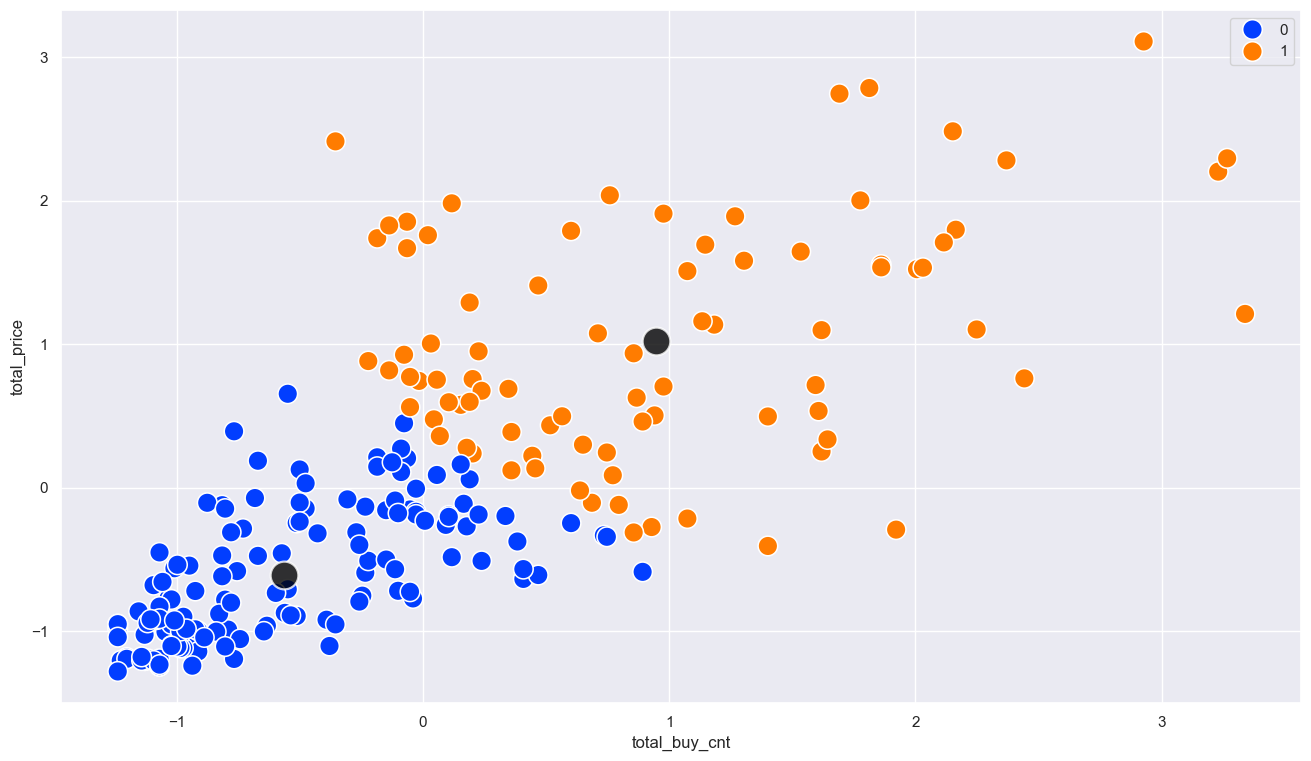

In [28]:
# 각 군집의 중심점
centers = model.cluster_centers_

sns.scatterplot(x=scaled_df['total_buy_cnt'], y=scaled_df['total_price'], hue=scaled_df['label'], s=200, palette='bright')
sns.scatterplot(x=centers[:,0], y=centers[:,1], color='black', alpha=0.8, s=400)

In [30]:
# inertia 값 확인
print(model.inertia_)

187.06526917589164


In [32]:
# scaled_df에 추가했던 label 열을 제거
scaled_df = scaled_df.drop(['label'], axis=1)

### Elbow Method

C:\Users\leoyo\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\leoyo\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\leoyo\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\leoyo\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Window

<Axes: >

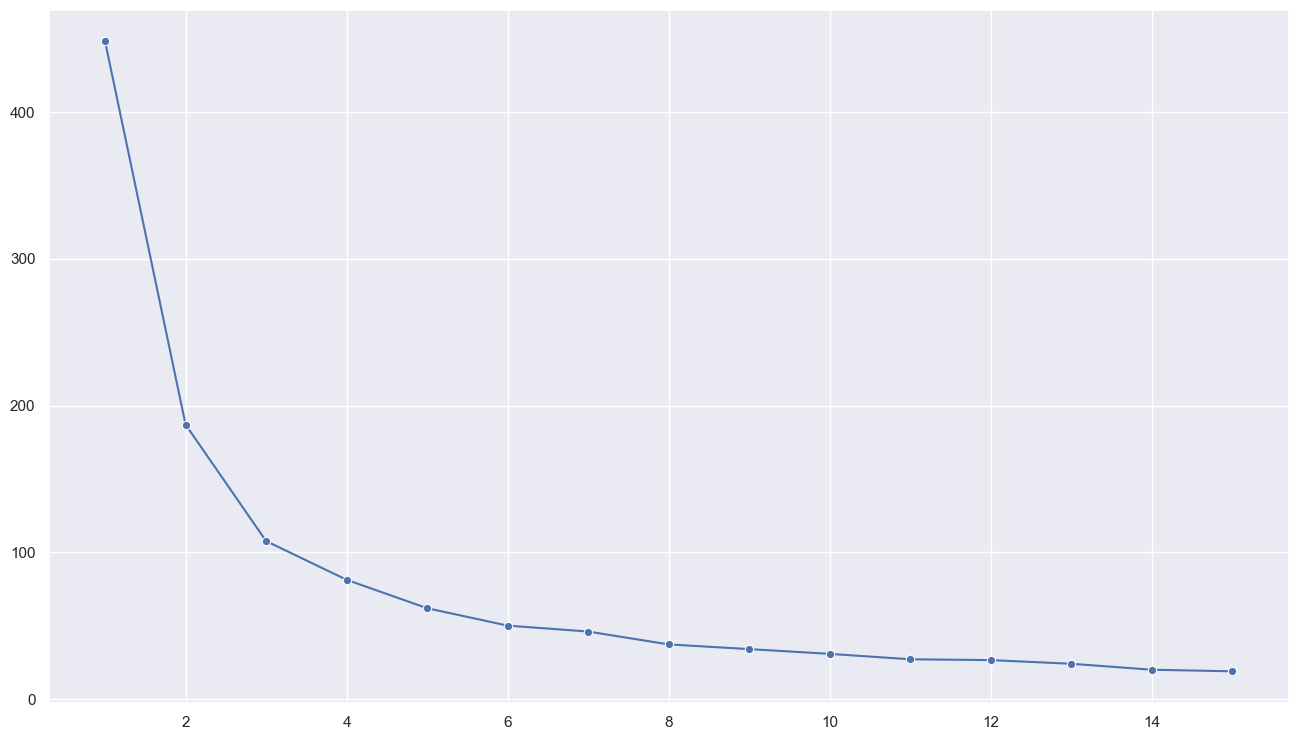

In [35]:
# inertia 값 저장할 리스트
inertias = []     

for k in range(1, 16): # k값의 범위 1~15로 지정
    model = KMeans(n_clusters=k, random_state=123)
    model.fit(scaled_df)
    inertias.append(model.inertia_)

# k값에 따른 inertia값 시각화
sns.lineplot(x=range(1, 16), y=inertias, marker='o')

In [37]:
model = KMeans(n_clusters=5, random_state=123)
model.fit(scaled_df)

C:\Users\leoyo\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=5, random_state=123)

In [39]:
sales_df['label'] = model.predict(scaled_df)

C:\Users\leoyo\AppData\Local\Temp\ipykernel_2820\3058466036.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sales_df['label'] = model.predict(scaled_df)


<Axes: xlabel='total_buy_cnt', ylabel='total_price'>

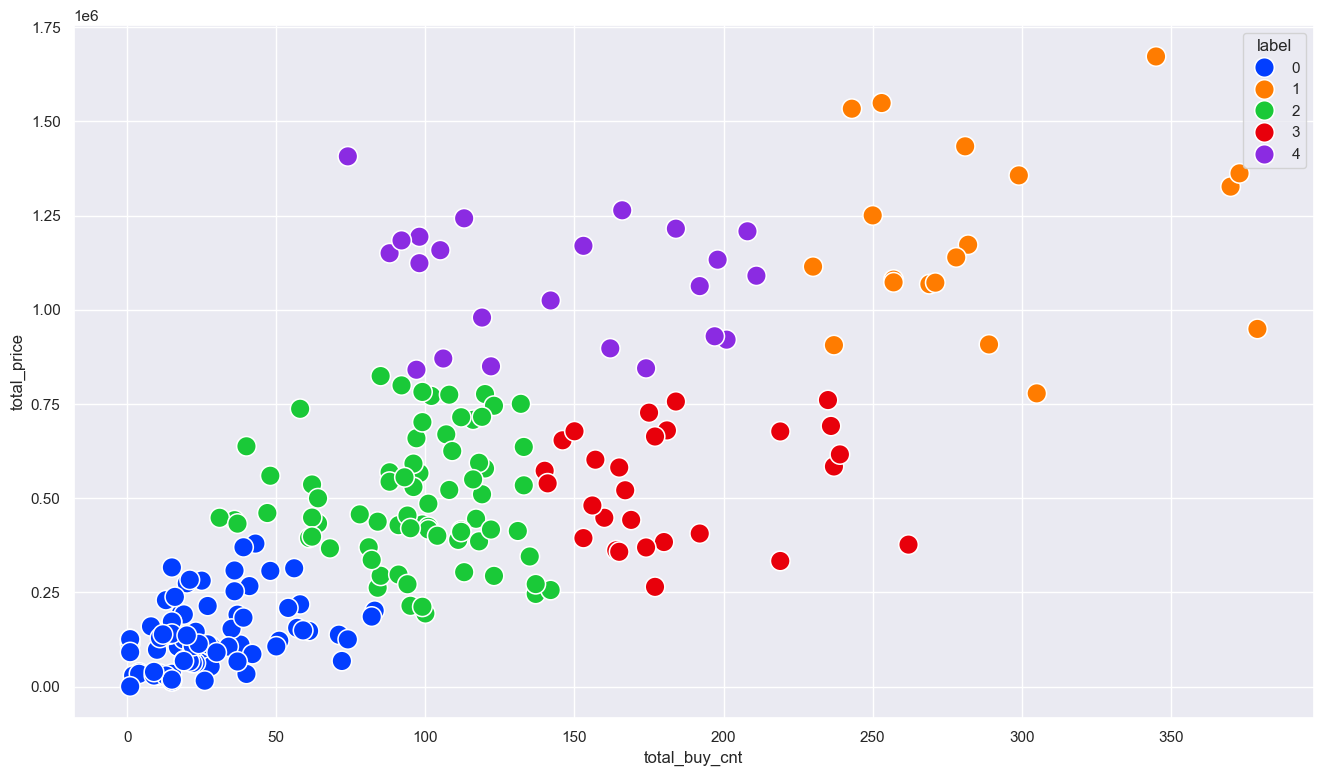

In [41]:
sns.scatterplot(x= sales_df['total_buy_cnt'], y= sales_df['total_price'], hue= sales_df['label'], s=200, palette='bright')

In [43]:
pd.DataFrame(sales_df['label'].value_counts())

,count
label,
0,81
2,74
3,28
4,23
1,19


In [45]:
groupby_df = sales_df.groupby('label').mean()

In [47]:
groupby_df['price_mean'] = groupby_df['total_price'] / groupby_df['total_buy_cnt']

In [49]:
groupby_df

,total_buy_cnt,total_price,price_mean
label,,,
0,27.63,"134,258.02","4,859.20"
1,287.79,"1,197,027.89","4,159.39"
2,96.42,"493,092.97","5,114.07"
3,182.86,"532,944.29","2,914.54"
4,143.48,"1,076,521.30","7,503.03"


### 계층적 클러스터링 실습

In [52]:
from scipy.cluster.hierarchy import dendrogram, linkage, cut_tree
import matplotlib.pyplot as plt

In [54]:
# 거리 : ward method
model = linkage(scaled_df, 'ward')

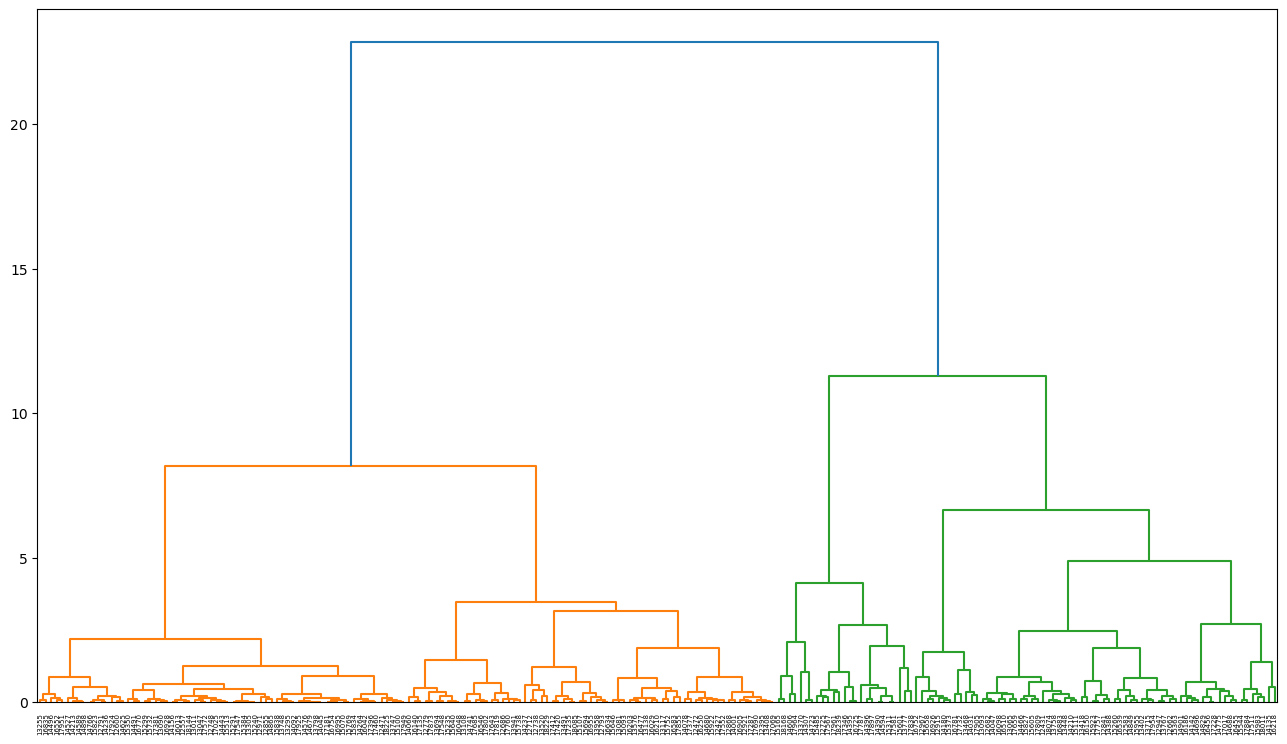

In [56]:
labelList = scaled_df.index 

# 덴드로그램 사이즈와 스타일 조정
plt.figure(figsize=(16,9))
plt.style.use("default")

dendrogram(model, labels=labelList)
plt.show()

In [58]:
cluster_num = 5

# 고객별 클러스터 라벨 구하기
scaled_df['label'] = cut_tree(model, cluster_num)

pd.DataFrame(scaled_df['label'].value_counts())

,count
label,
0,67
2,67
1,54
3,25
4,12


<Axes: xlabel='total_price', ylabel='total_buy_cnt'>

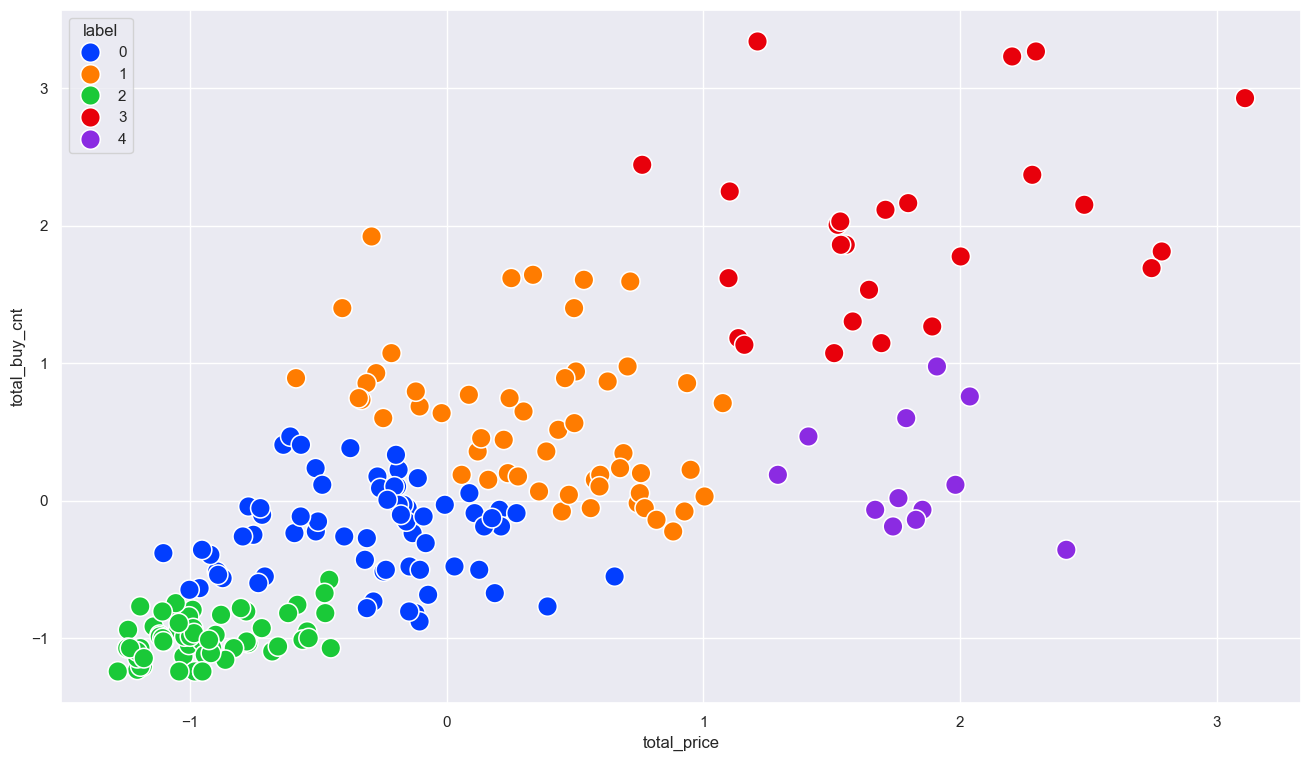

In [60]:
sns.set(style="darkgrid",
        rc = {'figure.figsize':(16,9)})

# 계층적 클러스터링
sns.scatterplot(x=scaled_df['total_price'], y=scaled_df['total_buy_cnt'], hue=scaled_df['label'], s=200, palette='bright')

### DBSCAN

<Axes: xlabel='0', ylabel='1'>

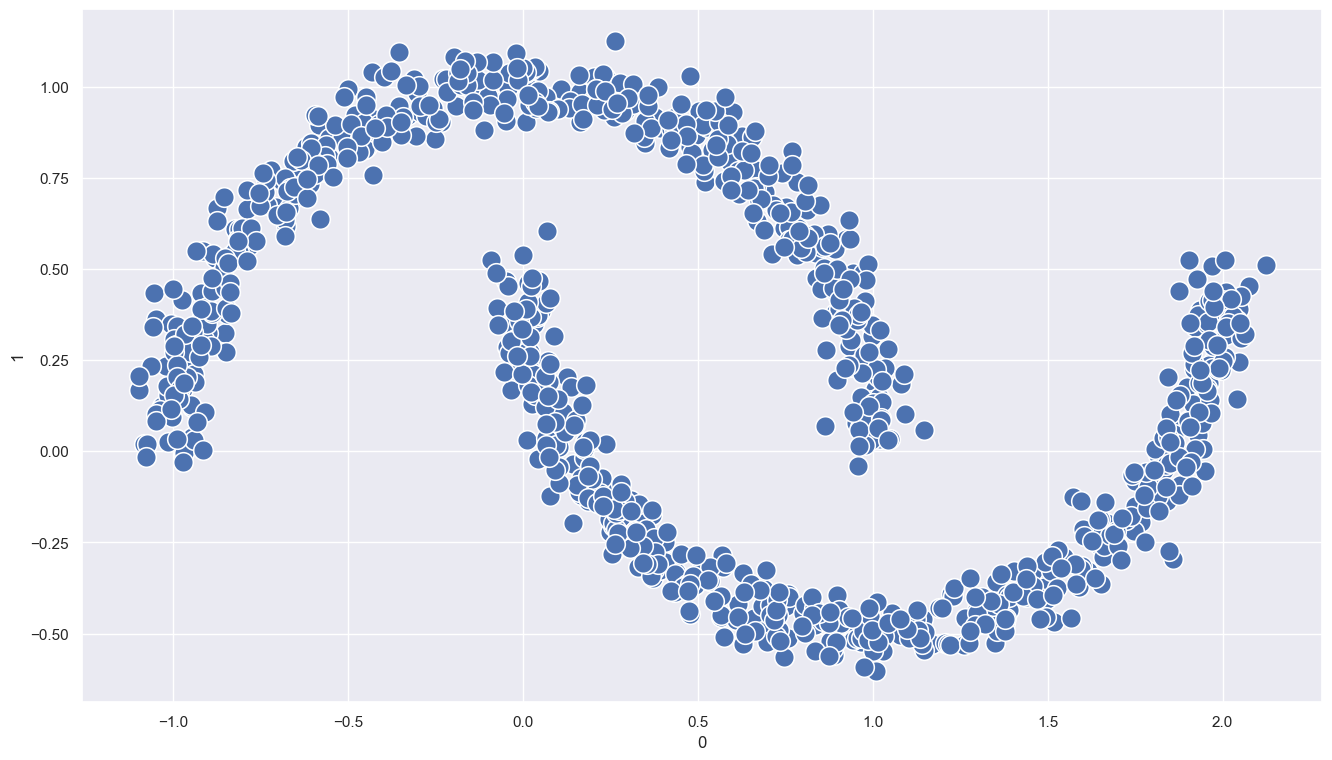

In [63]:
from sklearn.datasets import make_moons
import numpy as np

n_samples = 1000
np.random.seed(3)
X, y = make_moons(n_samples=n_samples, noise=.05)  # noise: 잡음의 크기. 0이면 정확한 반원을 이룸
df = pd.DataFrame(X)

#시각화
plt.figure(figsize=(16, 9))
sns.scatterplot(x=df[0], y=df[1], marker='o', s=200)

C:\Users\leoyo\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


<Axes: xlabel='0', ylabel='1'>

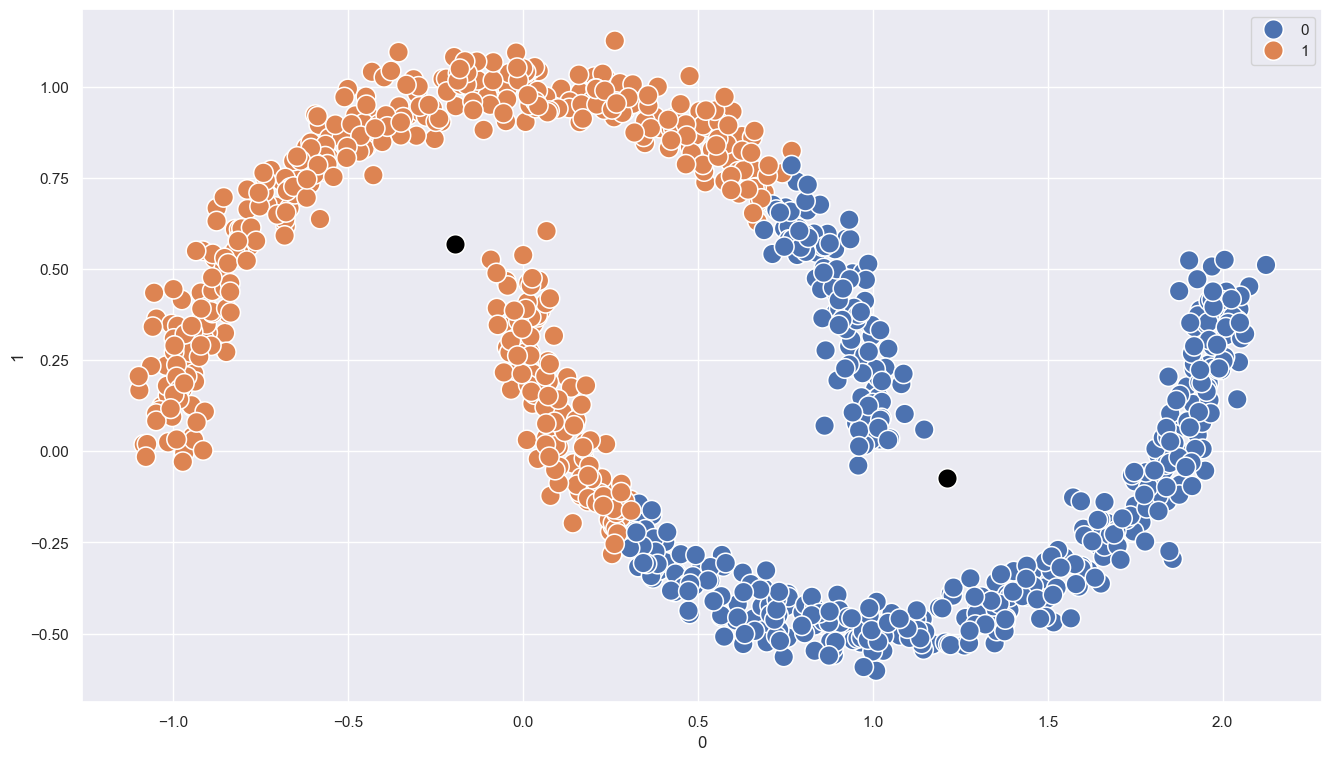

In [65]:
# k-means 모델 학습
model = KMeans(n_clusters=2, random_state = 123)
model.fit(df)

# 클러스터 라벨링
df['kmeans_label'] = model.predict(df)

# 각 군집의 중심점
centers = model.cluster_centers_

# 클러스터링 결과 시각화
plt.figure(figsize=(16, 9))

sns.scatterplot(x=df[0], y=df[1], hue=df['kmeans_label'] , s=200)
sns.scatterplot(x=centers[:,0], y=centers[:,1], color='black', s=200)

In [67]:
df = df.drop(columns=['kmeans_label'], axis=1)

<Axes: xlabel='0', ylabel='1'>

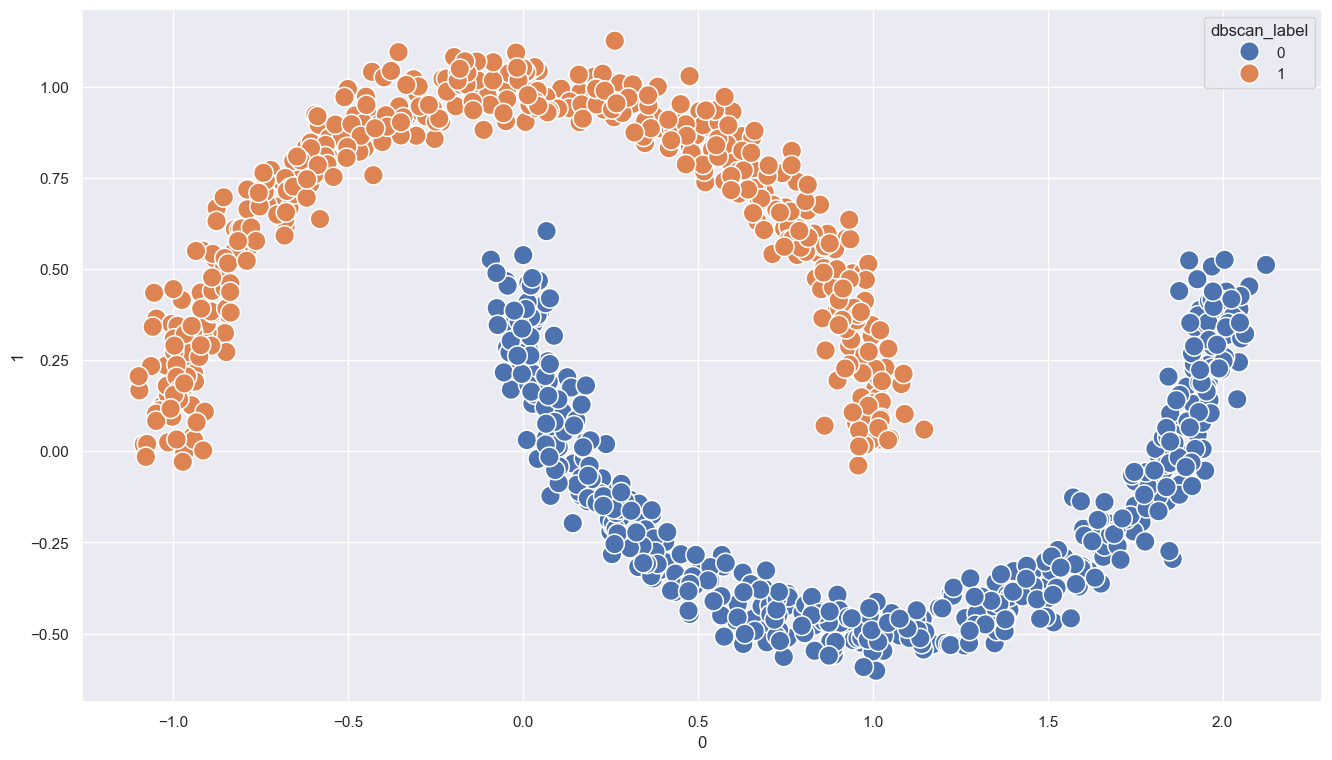

In [69]:
from sklearn.cluster import DBSCAN

eps = 0.1 # 반경
min_samples = 5 # 최소 데이터 갯수

# DBSCAN 모델 학습
model = DBSCAN(eps=eps, min_samples=min_samples)
model.fit(df)
df['dbscan_label'] = model.labels_

# 시각화
plt.figure(figsize=(16, 9))
sns.scatterplot(x=df[0], y=df[1], hue=df['dbscan_label'], s=200)

### GMM

<Axes: xlabel='0', ylabel='1'>

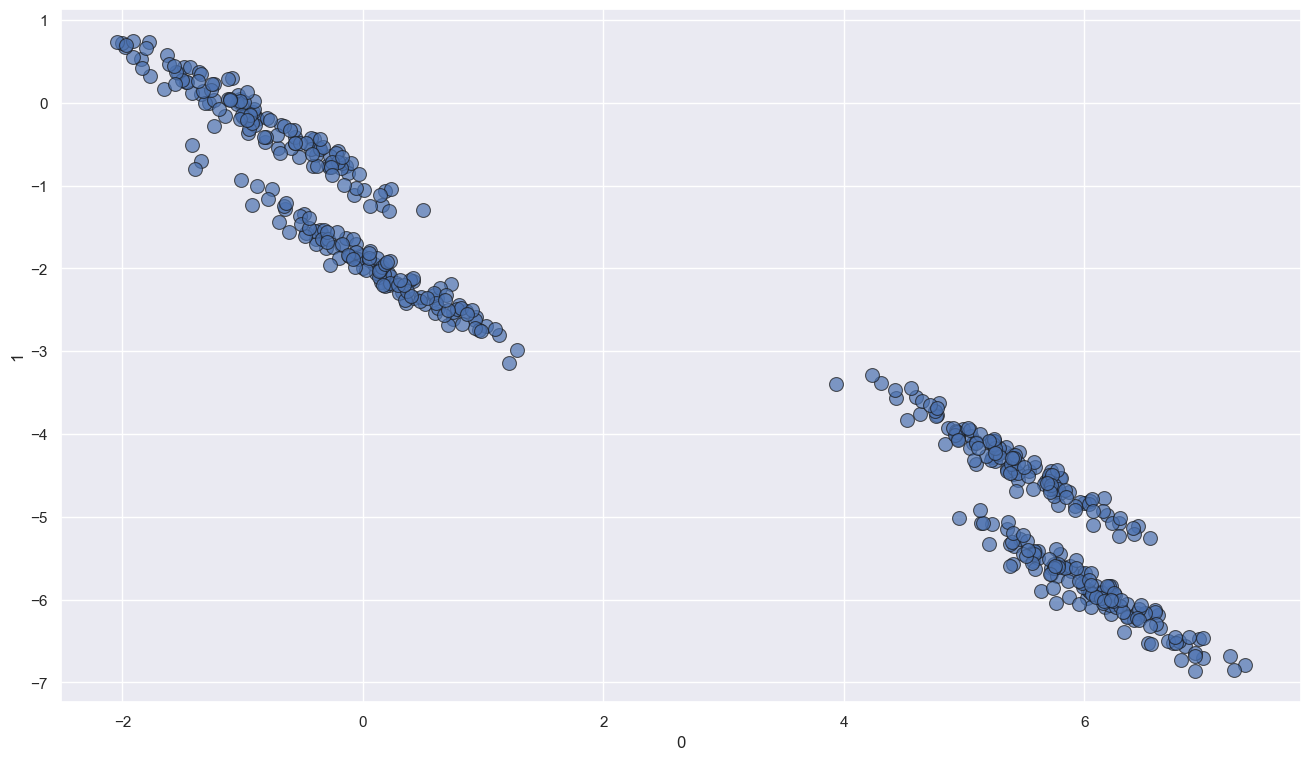

In [72]:
from sklearn.datasets import make_blobs

n_samples = 500   # 샘플 데이터 개수
centers = 4   # 클러스터 개수
cluster_std = 0.75   # 클러스터 내 표준편차
random_state = 13   # 샘플 데이터 고정
 
data, clusters = make_blobs(n_samples=n_samples, centers=centers, cluster_std=cluster_std, random_state=random_state)

# 데이터 타원형으로 만들기
tf = [[0.6, -0.6], [-0.4, 0.2]]
data_tf = data @ tf  # @ : 행렬의 곱을 나타냄
df = pd.DataFrame(data_tf)

# 시각화
sns.scatterplot(x=df[0], y=df[1], alpha = 0.7, edgecolor="k", s=100)

C:\Users\leoyo\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


<Axes: xlabel='0', ylabel='1'>

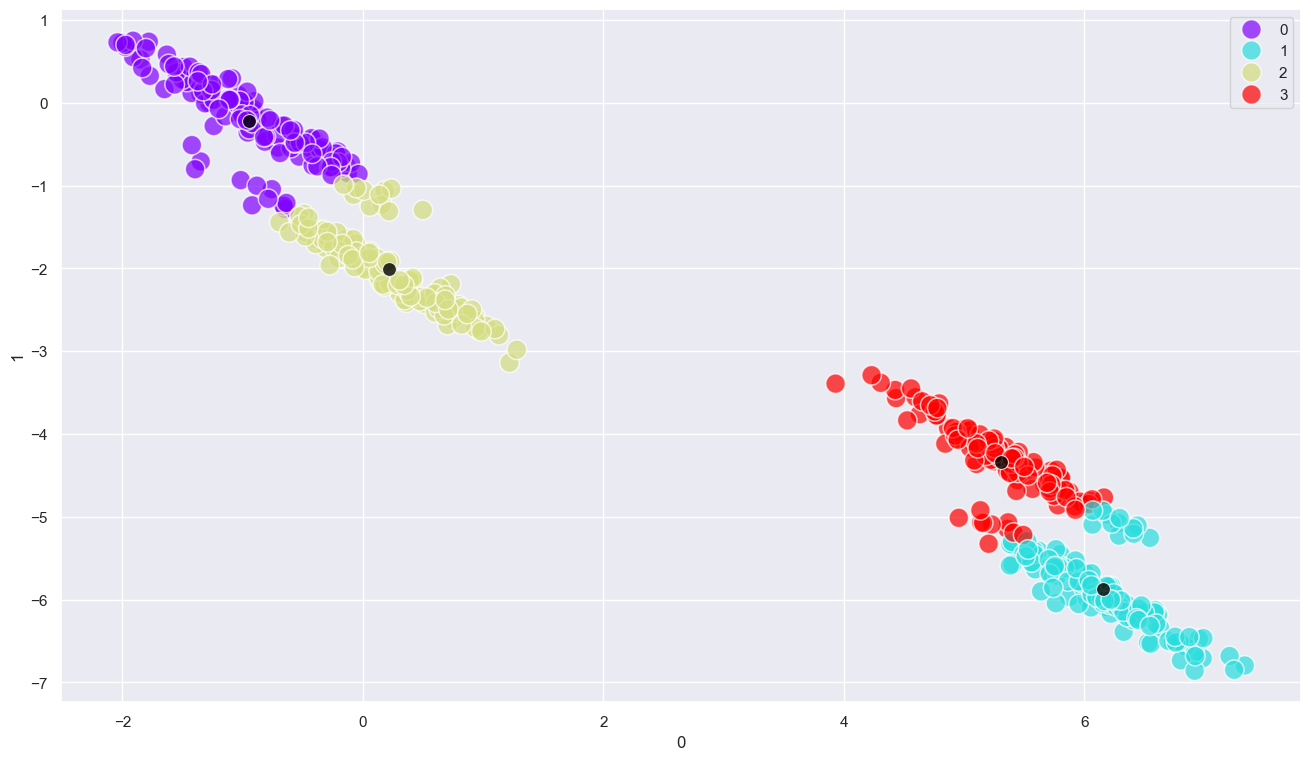

In [74]:
# k-means 학습
model = KMeans(n_clusters=4, random_state=123)
model.fit(df)
df['kmeans_label'] = model.predict(df)
centers = model.cluster_centers_ # 각 클러스터의 Centorid

# 시각화
sns.scatterplot(x=df[0], y=df[1], hue=df['kmeans_label'], palette='rainbow', alpha=0.7, s=200)
sns.scatterplot(x=centers[:,0], y=centers[:,1], color='black', alpha=0.8, s=100)

C:\Users\leoyo\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


<Axes: xlabel='0', ylabel='1'>

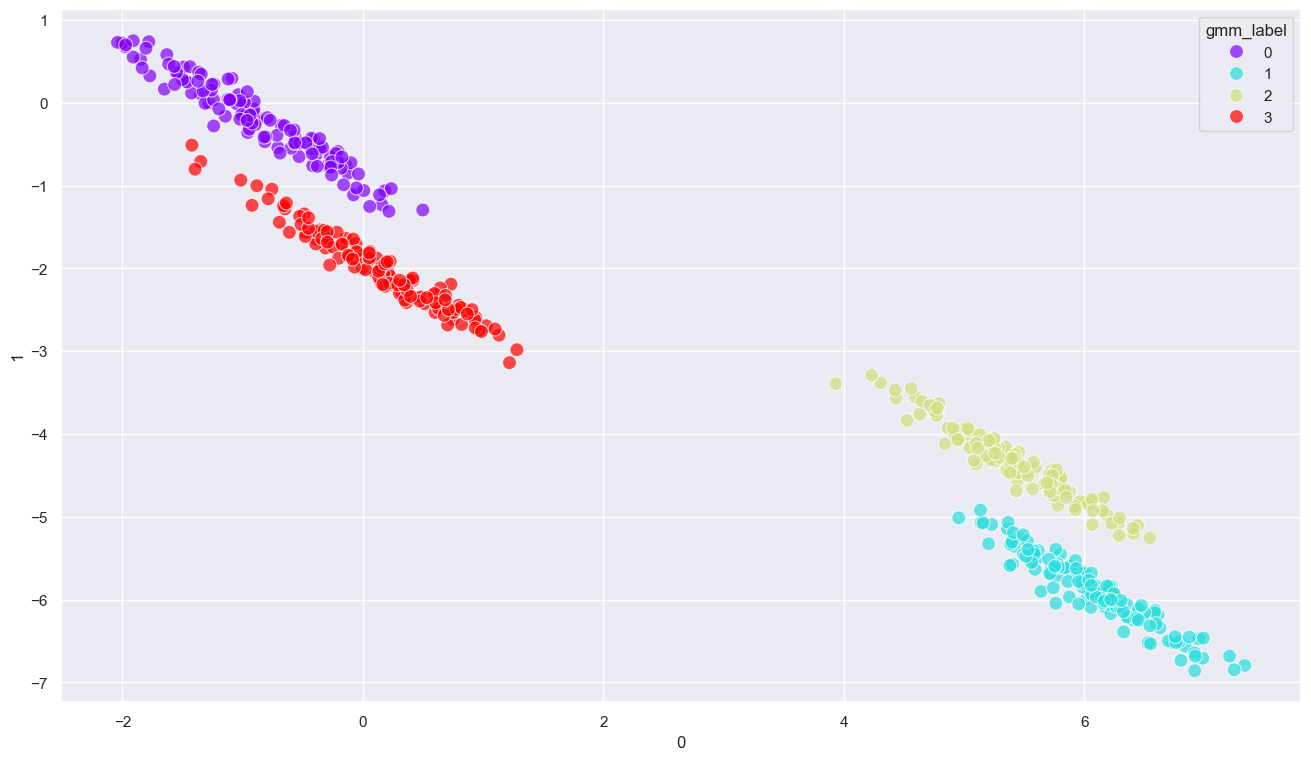

In [76]:
df = df.drop(columns=['kmeans_label'], axis=1)

from sklearn.mixture import GaussianMixture

n_components = 4    # 분포 개수
random_state = 10   # 모델 고정

model = GaussianMixture(n_components=n_components, random_state=random_state)

# GMM 모델 학습
model.fit(df)
df['gmm_label'] = model.predict(df)

# 시각화
sns.scatterplot(x=df[0], y=df[1],  hue=df['gmm_label'], palette='rainbow', alpha=0.7, s=100)